EX 1

here


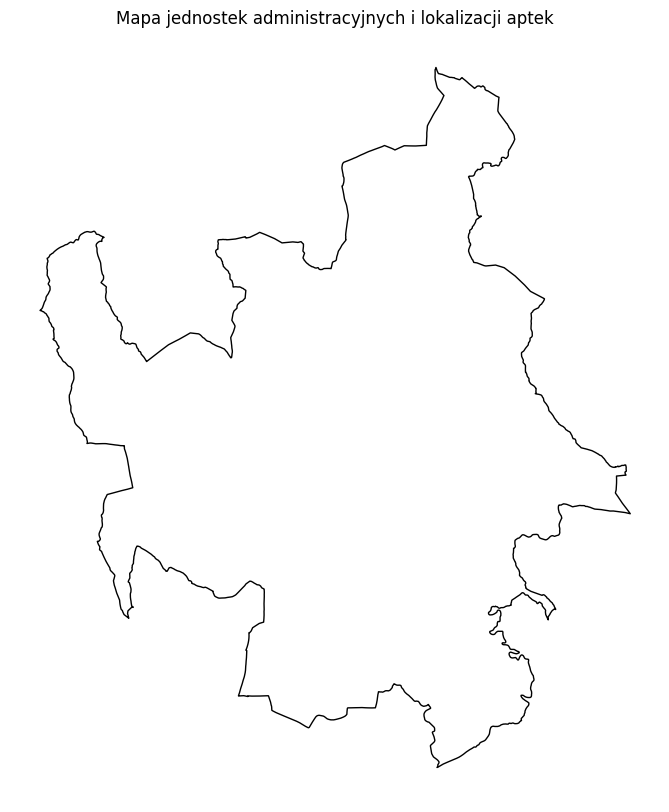

In [4]:
import os
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

folder_path = 'f1ex1'

file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.shp') and file.startswith('c')]

coimbra = r'f1ex1/limites_coimbra.shp'

target_crs = CRS.from_epsg(3763)
coimbra_df = gpd.read_file(coimbra)
coimbra_df.crs = target_crs
# coimbra_df = coimbra_df.to_crs(target_crs)


gdfs = []
for file_path in file_paths:
    gdf = gpd.read_file(file_path)
    gdf.crs = target_crs

fig, ax = plt.subplots(figsize=(10, 10))
coimbra_df.plot(ax=ax, color='white', edgecolor='black')
for gdf in gdfs:
    gdf.plot(ax=ax, color='red', markersize=5)

# Wyświetl mapę
plt.title('Mapa jednostek administracyjnych i lokalizacji aptek')
plt.axis('off')
plt.show()

# clipped_gdfs = []
# for gdf in gdfs:
#     clipped_gdf = gpd.overlay(gdf, coimbra_df, how='intersection')
#     clipped_gdfs.append(clipped_gdf)

# merged_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(unary_union([gdf.unary_union for gdf in clipped_gdfs])), crs=target_crs)

# # Zapisz do pliku 'result_ex1.shp'
# merged_gdf.to_file('result_ex1.shp')

Ex 2

<Axes: >

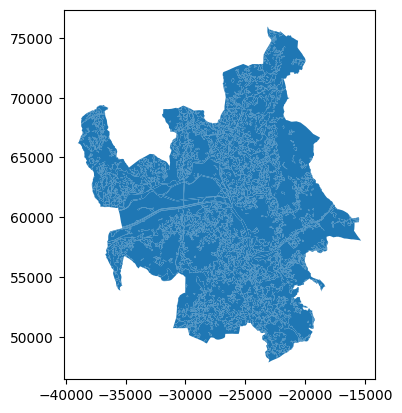

In [2]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
area2007 = r'f1ex2/cmb_cos07.shp'
area2018 = r'f1ex2/cmb_cos18.shp'

df2007 = gpd.read_file(area2007)
df2018 = gpd.read_file(area2018)

df2007.plot()

In [10]:
# print(df2007.head()) # display head of attribute table
# print(df2007.columns) 
print(df2007.COS07n1_L.head())
pd.unique(df2007.COS07n1_L)

0    Territórios artificializados
1    Territórios artificializados
2    Territórios artificializados
3    Territórios artificializados
4    Territórios artificializados
Name: COS07n1_L, dtype: object


array(['Territórios artificializados', 'Agricultura', 'Pastagens',
       'Florestas', 'Matos', 'Espaços descobertos ou com pouca vegetação',
       'Zonas húmidas', 'Massas de água superficiais'], dtype=object)

<AxesSubplot: >

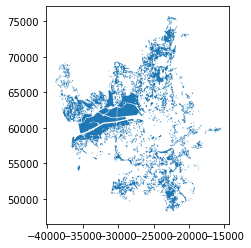

In [45]:
# filter
df2007_agr = df2007[df2007.COS07n1_L == 'Agricultura']
df2007_agr.plot()

<AxesSubplot: >

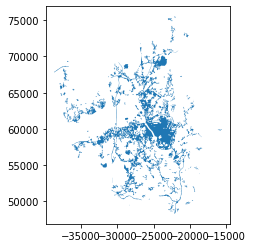

In [47]:
df2018_terr_art = df2018[df2018.COS18n1_L == 'Territórios artificializados']
df2018_terr_art.plot()

91.33955595217054

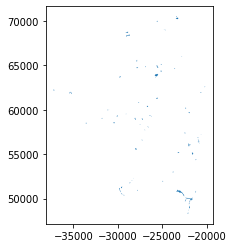

In [48]:
common_polygons = gpd.overlay(df2007_agr, df2018_terr_art, how='intersection', keep_geom_type=True)
total_area_hectares = sum(common_polygons['geometry'].area / 10_000)

common_polygons.plot()

total_area_hectares

EX 3

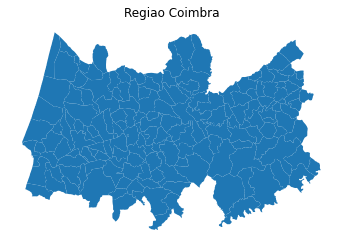

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DICOFRE     168 non-null    object  
 1   Freguesia   168 non-null    object  
 2   Concelho    168 non-null    object  
 3   Distrito    168 non-null    object  
 4   Area_ha     168 non-null    float64 
 5   Des_Simpli  168 non-null    object  
 6   geometry    168 non-null    geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 9.3+ KB


In [40]:
fregRegio = gpd.read_file(r'f1ex3\freg_regiao_coimbra.shp')

fregRegio.plot()
plt.title('Regiao Coimbra')
plt.axis('off')  # Wyłączenie osi
plt.show()

fregRegio.info()

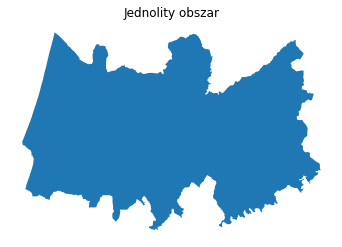

In [43]:
jednolity_obszar = fregRegio.unary_union

# Konwertuj jednolity obszar na GeoDataFrame
jednolity_obszar_gdf = gpd.GeoDataFrame(geometry=[jednolity_obszar])

# Wyświetl mapę jednolitego obszaru
jednolity_obszar_gdf.plot()
plt.title('Jednolity obszar')
plt.axis('off')  # Wyłączenie osi
plt.show()

Ex 4

<AxesSubplot: >

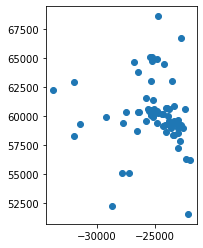

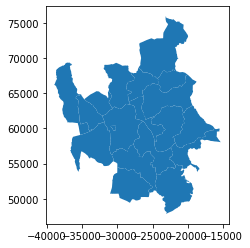

In [51]:
location_farmacias = gpd.read_file('f1ex4/farmacias_e_para.shp')
freg_coimbra = gpd.read_file('f1ex4/freg_cmb.shp')
location_farmacias.plot()
freg_coimbra.plot()

In [64]:
joined_data = gpd.sjoin(location_farmacias, freg_coimbra, how='left', op='within')

# Wyświetl wynik
apteki_w_freguesiach = joined_data.groupby('Freguesia').size().reset_index(name='farmacies')
freg_coimbra_with_apteki = freg_coimbra.set_index('Freguesia').join(apteki_w_freguesiach.set_index('Freguesia'))

# Wyświetl wynik
freg_coimbra_with_apteki

c:\Users\Marta\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,Des_Simpli,idconc,idfreg,popres11,geometry,farmacies
Freguesia,,,,,,
Almalaguês,Almalaguês,0603,060301,3111,"POLYGON ((-20725.391 54329.725, -20725.501 543...",1.0
Brasfemes,Brasfemes,0603,060309,1969,"POLYGON ((-20373.719 67919.039, -20371.189 679...",1.0
Ceira,Ceira,0603,060311,3701,"POLYGON ((-15310.581 58040.966, -15517.961 580...",1.0
Cernache,Cernache,0603,060312,4048,"POLYGON ((-25425.752 50852.985, -25426.372 508...",1.0
Santo António dos Olivais,Santo António dos Olivais,0603,060318,38936,"POLYGON ((-20630.040 62210.340, -20630.831 622...",19.0
São João do Campo,São João do Campo,0603,060320,2073,"POLYGON ((-30747.845 62907.662, -30742.494 628...",1.0
São Silvestre,São Silvestre,0603,060324,3122,"POLYGON ((-34722.973 64155.281, -34706.203 641...",1.0
Torres do Mondego,Torres do Mondego,0603,060329,2402,"POLYGON ((-17637.484 61128.630, -17604.283 610...",NaN
União das freguesias de Antuzede e Vil de Matos,Antuzede e Vil de Matos,0603,060332,3146,"POLYGON ((-28119.941 67978.243, -28113.110 679...",NaN


In [63]:
freg_coimbra_with_apteki['result'] = (freg_coimbra_with_apteki['farmacies'] / freg_coimbra_with_apteki['popres11']) * 10000

freg_coimbra_with_apteki['result']

Freguesia
Almalaguês                                                                           3.214401
Brasfemes                                                                            5.078720
Ceira                                                                                2.701972
Cernache                                                                             2.470356
Santo António dos Olivais                                                            4.879803
São João do Campo                                                                    4.823927
São Silvestre                                                                        3.203075
Torres do Mondego                                                                         NaN
União das freguesias de Antuzede e Vil de Matos                                           NaN
União das freguesias de Assafarge e Antanhol                                         3.772161
União das freguesias de Coimbra (Sé Nova, Santa Cr

Ex 5

<Axes: >

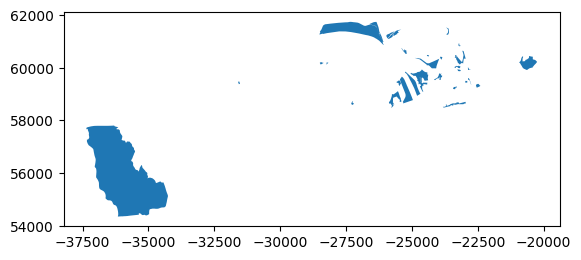

In [171]:
urban_green_space = gpd.read_file('f1ex5/espacos_verdes.shp')
freg_coimbra = gpd.read_file('f1ex5/freg_cmb.shp')
urban_green_space.plot()

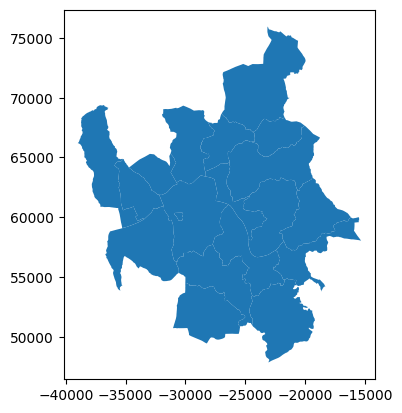

In [184]:
freg_coimbra.plot()
freg_coimbra.set_index('Freguesia', inplace=True)

Freguesia
União das freguesias de Souselas e Botão                                                    NaN
Cernache                                                                                    NaN
Almalaguês                                                                                  NaN
União das freguesias de Assafarge e Antanhol                                                NaN
Ceira                                                                                       NaN
União das freguesias de Taveiro, Ameal e Arzila                                     1370.263849
União das freguesias de Taveiro, Ameal e Arzila                                     1370.263849
União das freguesias de Santa Clara e Castelo Viegas                                  26.070059
Santo António dos Olivais                                                              9.509354
Torres do Mondego                                                                     82.795068
União das freguesias de São Ma

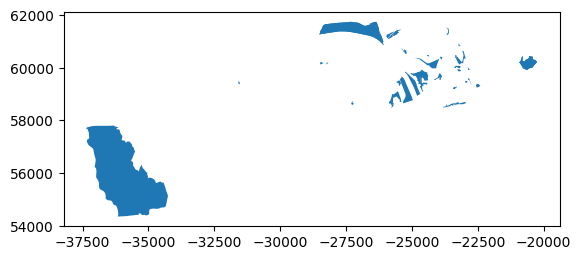

In [217]:
urban_green_space_clipped = gpd.sjoin(freg_coimbra, urban_green_space, how='right', predicate='intersects')
urban_green_space_clipped.plot()
urban_green_space_clipped['area_m2'] = urban_green_space_clipped['geometry'].area
freg_coimbra['area_green'] = urban_green_space_clipped.groupby('index_left')['area_m2'].sum()
# 
# green_area_sum
freg_coimbra['green_per_person'] = freg_coimbra['area_green']/freg_coimbra['popres11']
freg_coimbra.green_per_person

Ex6

In [39]:
import geopandas as gpd

bgri = gpd.read_file('f1ex6/bgri_coimbra.shp')
idfreg = gpd.read_file('f1ex6/freg_coimbra.shp')

idfreg
bgri

,idfreg,bgri21,popres21,geometry
0,060318,06031802203,38,"POLYGON ((-23372.399 57505.522, -23370.432 575..."
1,060340,06034000216,31,"POLYGON ((-32553.522 57399.877, -32537.779 573..."
2,060340,06034000217,33,"POLYGON ((-34784.331 57438.812, -34841.950 574..."
3,060340,06034000301,32,"POLYGON ((-34620.937 57775.195, -34606.895 577..."
4,060340,06034000302,48,"POLYGON ((-34393.656 57696.614, -34387.312 576..."
...,...,...,...,...
1843,060340,06034000318,34,"POLYGON ((-32788.945 58002.638, -32800.695 580..."
1844,060334,06033401610,20,"POLYGON ((-25327.547 60164.847, -25334.949 601..."
1845,060334,06033401102,12,"POLYGON ((-24931.246 60150.821, -24927.651 601..."
1846,060334,06033401107,8,"POLYGON ((-25026.902 60229.667, -25032.668 602..."


In [41]:
idfreg.rename(columns={'DICOFRE': 'idfreg'}, inplace=True)
result = bgri.merge(idfreg, on='idfreg', how='inner')
result

,idfreg,bgri21,popres21,geometry_x,Freguesia,Concelho,Distrito,Area_ha,Des_Simpli,geometry_y
0,060318,06031802203,38,"POLYGON ((-23372.399 57505.522, -23370.432 575...",Santo António dos Olivais,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622..."
1,060318,06031803002,25,"POLYGON ((-23187.945 57971.750, -23200.384 579...",Santo António dos Olivais,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622..."
2,060318,06031802209,5,"POLYGON ((-21756.876 57982.049, -21902.022 578...",Santo António dos Olivais,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622..."
3,060318,06031802801,217,"POLYGON ((-24132.777 58019.972, -24170.084 580...",Santo António dos Olivais,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622..."
4,060318,06031802911,8,"POLYGON ((-24479.488 58098.493, -24482.717 580...",Santo António dos Olivais,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622..."
...,...,...,...,...,...,...,...,...,...,...
1843,060320,06032000207,9,"POLYGON ((-31913.486 63174.152, -31907.264 631...",São João do Campo,Coimbra,Coimbra,791.95,São João do Campo,"POLYGON ((-30747.845 62907.662, -30742.494 628..."
1844,060320,06032000203,34,"POLYGON ((-31773.395 62994.200, -31772.357 629...",São João do Campo,Coimbra,Coimbra,791.95,São João do Campo,"POLYGON ((-30747.845 62907.662, -30742.494 628..."
1845,060320,06032000111,20,"POLYGON ((-32187.404 63682.234, -32217.508 636...",São João do Campo,Coimbra,Coimbra,791.95,São João do Campo,"POLYGON ((-30747.845 62907.662, -30742.494 628..."
1846,060320,06032000116,72,"POLYGON ((-32325.317 64028.198, -32323.007 640...",São João do Campo,Coimbra,Coimbra,791.95,São João do Campo,"POLYGON ((-30747.845 62907.662, -30742.494 628..."


In [22]:
result['population_density'] = result.popres21/result.Area_ha
result.set_index('Freguesia', inplace=True)
result.population_density

Freguesia
Santo António dos Olivais    0.019716
Santo António dos Olivais    0.012971
Santo António dos Olivais    0.002594
Santo António dos Olivais    0.112591
Santo António dos Olivais    0.004151
                               ...   
São João do Campo            0.011364
São João do Campo            0.042932
São João do Campo            0.025254
São João do Campo            0.090915
São João do Campo            0.152787
Name: population_density, Length: 1848, dtype: float64

In [56]:
import geopandas as gpd

# Read the GeoDataFrames
bgri = gpd.read_file('f1ex6/bgri_coimbra.shp')
freg = gpd.read_file('f1ex6/freg_coimbra.shp')

# Merge the two GeoDataFrames based on the common ID columns
merged_data = bgri.merge(freg, left_on='idfreg', right_on='DICOFRE', how='inner')
merged_data
# Calculate the population density
merged_data['population_density'] = merged_data['popres21'] / merged_data['Area_ha']

# Print the result, including Freguesia ID and population 
densityresult = merged_data[['Freguesia', 'population_density']].groupby('Freguesia').sum()
densityresult

,population_density
Freguesia,
Almalaguês,1.231658
Brasfemes,2.105057
Ceira,2.610886
Cernache,2.067289
Santo António dos Olivais,21.350781
São João do Campo,2.304438
São Silvestre,2.719645
Torres do Mondego,1.220676
União das freguesias de Antuzede e Vil de Matos,1.612583


Ex 7

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

bgri = gpd.read_file('f1ex7/bgri_coimbra.shp')
freg = gpd.read_file('f1ex7/freg_coimbra.shp')
recycling_bins = gpd.read_file('f1ex7/ecopontos19.shp')

# Merge the GeoDataFrames based on the common ID columns
merged_data = bgri.merge(freg, left_on='idfreg', right_on='DICOFRE', how='inner')
merged_data

# Calculate the population density
merged_data['population_density'] = merged_data['popres21'] / merged_data['Area_ha']
merged_data

# # Create a buffer of 500 meters around recycling bins
recycling_bins['geometry'] = recycling_bins['geometry'].buffer(500)
recycling_bins
# # Spatially join the population data with recycling bin data
# joined_data = gpd.sjoin(merged_data, recycling_bins, op='within', how='left')
# 
# # Calculate the population within 500 meters of a recycling bin
# population_within_buffer = joined_data.groupby('idfreg')['popres21'].sum()
# population_within_buffer
# Calculate the total population in each Freguesia
# total_population = merged_data.groupby('idfreg')['popres21'].sum()
# 
# # Calculate the percentage of individuals living within 500 meters of a recycling bin
# percentage_within_500m = (population_within_buffer / total_population) * 100
# 
# # Create a DataFrame with Freguesia ID and percentage
# result = pd.DataFrame({'idfreg': percentage_within_500m.index, 'percentage_within_500m': percentage_within_500m.values})
# 
# # Display the result
# print(result)


Ex 8

<Axes: >

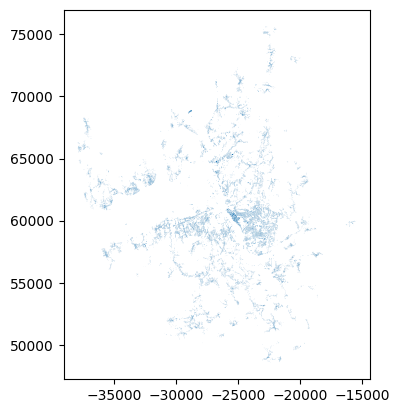

In [117]:
areas = gpd.read_file('f1ex8/areas_habitadas.shp')
freg = gpd.read_file('f1ex8/freg_coimbra.shp')
areas.plot()

<Axes: >

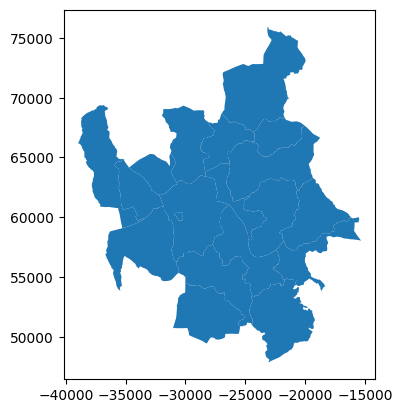

In [118]:
freg.plot()

In [119]:
freg['Area_m2_freg'] = freg['Area_ha'] * 10000
freg

,DICOFRE,Freguesia,Concelho,Distrito,Area_ha,Des_Simpli,geometry,Area_m2_freg
0,060301,Almalaguês,Coimbra,Coimbra,2316.39,Almalaguês,"POLYGON ((-20725.391 54329.725, -20725.501 543...",23163900.0
1,060309,Brasfemes,Coimbra,Coimbra,917.79,Brasfemes,"POLYGON ((-20373.719 67919.039, -20371.189 679...",9177900.0
2,060311,Ceira,Coimbra,Coimbra,1242.49,Ceira,"POLYGON ((-15310.581 58040.966, -15517.960 580...",12424900.0
3,060312,Cernache,Coimbra,Coimbra,1916.52,Cernache,"POLYGON ((-25425.752 50852.985, -25426.372 508...",19165200.0
4,060318,Santo António dos Olivais,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622...",19273300.0
5,060320,São João do Campo,Coimbra,Coimbra,791.95,São João do Campo,"POLYGON ((-30747.845 62907.662, -30742.494 628...",7919500.0
6,060324,São Silvestre,Coimbra,Coimbra,1027.34,São Silvestre,"POLYGON ((-34722.973 64155.281, -34706.203 641...",10273400.0
7,060329,Torres do Mondego,Coimbra,Coimbra,1666.29,Torres do Mondego,"POLYGON ((-17637.484 61128.630, -17604.283 610...",16662900.0
8,060332,União das freguesias de Antuzede e Vil de Matos,Coimbra,Coimbra,1762.39,Antuzede e Vil de Matos,"POLYGON ((-28119.941 67978.243, -28113.110 679...",17623900.0
9,060333,União das freguesias de Assafarge e Antanhol,Coimbra,Coimbra,1951.13,Assafarge e Antanhol,"POLYGON ((-24401.212 53425.041, -24416.721 534...",19511300.0


In [120]:
areas['Area_m2_inh'] = areas['geometry'].area
areas

,bgri,Shape_Leng,Shape_Area,geometry,Area_m2_inh
0,06030100101,66.888951,200.710630,"POLYGON ((-22421.586 48587.280, -22412.616 485...",200.710630
1,06030100101,63.850404,230.239119,"POLYGON ((-22571.852 48617.500, -22592.758 486...",230.239119
2,06030100101,53.180390,171.703745,"POLYGON ((-22625.424 48638.042, -22625.598 486...",171.703745
3,06030100101,87.448168,300.599742,"POLYGON ((-22505.656 48660.287, -22487.331 486...",300.599742
4,06030100101,47.990497,142.568602,"POLYGON ((-22554.845 48674.914, -22558.303 486...",142.568602
...,...,...,...,...,...
35563,06034100318,157.072073,604.524678,"POLYGON ((-25440.149 67808.125, -25437.006 678...",604.524678
35564,06034100318,40.429065,82.410065,"POLYGON ((-25506.089 67806.956, -25521.061 678...",82.410065
35565,06034100318,59.188680,171.844124,"POLYGON ((-25523.519 67802.801, -25545.359 678...",171.844124
35566,06034100318,52.012083,168.390997,"POLYGON ((-25515.375 67835.193, -25516.680 678...",168.390997


In [122]:
result = gpd.sjoin(areas, freg, how='left', predicate='intersects')
result

,bgri,Shape_Leng,Shape_Area,geometry,Area_m2_inh,index_right,DICOFRE,Freguesia,Concelho,Distrito,Area_ha,Des_Simpli,Area_m2_freg
0,06030100101,66.888951,200.710630,"POLYGON ((-22421.586 48587.280, -22412.616 485...",200.710630,0,060301,Almalaguês,Coimbra,Coimbra,2316.39,Almalaguês,23163900.0
1,06030100101,63.850404,230.239119,"POLYGON ((-22571.852 48617.500, -22592.758 486...",230.239119,0,060301,Almalaguês,Coimbra,Coimbra,2316.39,Almalaguês,23163900.0
2,06030100101,53.180390,171.703745,"POLYGON ((-22625.424 48638.042, -22625.598 486...",171.703745,0,060301,Almalaguês,Coimbra,Coimbra,2316.39,Almalaguês,23163900.0
3,06030100101,87.448168,300.599742,"POLYGON ((-22505.656 48660.287, -22487.331 486...",300.599742,0,060301,Almalaguês,Coimbra,Coimbra,2316.39,Almalaguês,23163900.0
4,06030100101,47.990497,142.568602,"POLYGON ((-22554.845 48674.914, -22558.303 486...",142.568602,0,060301,Almalaguês,Coimbra,Coimbra,2316.39,Almalaguês,23163900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35563,06034100318,157.072073,604.524678,"POLYGON ((-25440.149 67808.125, -25437.006 678...",604.524678,17,060341,União das freguesias de Trouxemil e Torre de V...,Coimbra,Coimbra,1055.78,Trouxemil e Torre de Vilela,10557800.0
35564,06034100318,40.429065,82.410065,"POLYGON ((-25506.089 67806.956, -25521.061 678...",82.410065,17,060341,União das freguesias de Trouxemil e Torre de V...,Coimbra,Coimbra,1055.78,Trouxemil e Torre de Vilela,10557800.0
35565,06034100318,59.188680,171.844124,"POLYGON ((-25523.519 67802.801, -25545.359 678...",171.844124,17,060341,União das freguesias de Trouxemil e Torre de V...,Coimbra,Coimbra,1055.78,Trouxemil e Torre de Vilela,10557800.0
35566,06034100318,52.012083,168.390997,"POLYGON ((-25515.375 67835.193, -25516.680 678...",168.390997,17,060341,União das freguesias de Trouxemil e Torre de V...,Coimbra,Coimbra,1055.78,Trouxemil e Torre de Vilela,10557800.0


In [135]:
new = result.groupby('Freguesia')['Area_m2_inh'].sum()
freg.set_index('Freguesia', inplace=True)

# freg[['Freguesia', 'Area_m2_freg', 'inhabitad_area_m2']]

KeyError: "None of ['Freguesia'] are in the columns"

In [140]:
freg['inhab'] = new
freg['percentage'] = freg['inhab']*100/freg['Area_m2_freg']
freg['percentage']

Freguesia
Almalaguês                                                                           1.604077
Brasfemes                                                                            1.611077
Ceira                                                                                2.531285
Cernache                                                                             2.074813
Santo António dos Olivais                                                            7.205082
São João do Campo                                                                    2.701612
São Silvestre                                                                        2.612027
Torres do Mondego                                                                    1.113628
União das freguesias de Antuzede e Vil de Matos                                      1.923599
União das freguesias de Assafarge e Antanhol                                         2.413503
União das freguesias de Coimbra (Sé Nova, Santa Cr

Ex 9

<Axes: >

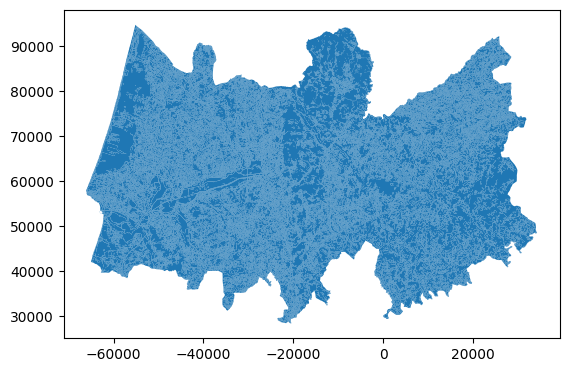

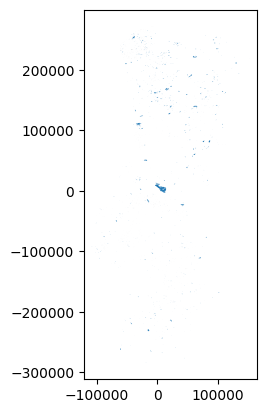

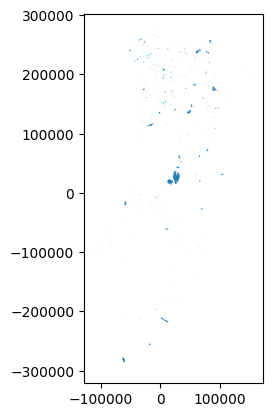

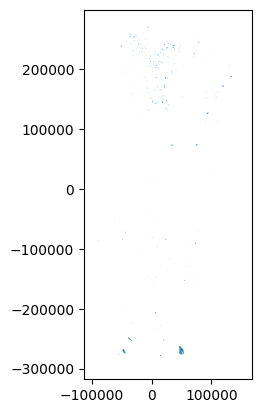

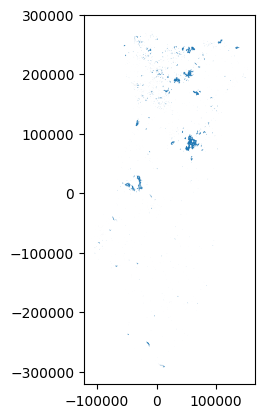

In [150]:
cos2018 = gpd.read_file('f1ex9/cos2018.shp')
aa19 = gpd.read_file('f1ex9/aa_2019.shp')
aa20 = gpd.read_file('f1ex9/aa_2020.shp')
aa21 = gpd.read_file('f1ex9/aa_2021.shp')
aa22 = gpd.read_file('f1ex9/ardida_2022.shp')
cos2018.plot()
aa19.plot()
aa20.plot()
aa21.plot()
aa22.plot()

<Axes: >

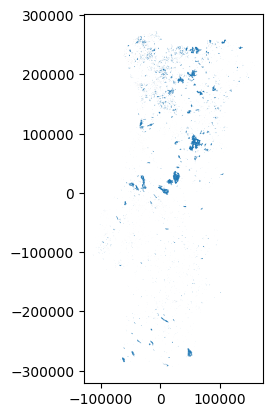

In [158]:
burns = gpd.GeoDataFrame(pd.concat([aa19, aa20, aa21, aa22], ignore_index=True))
burns.plot()

<Axes: >

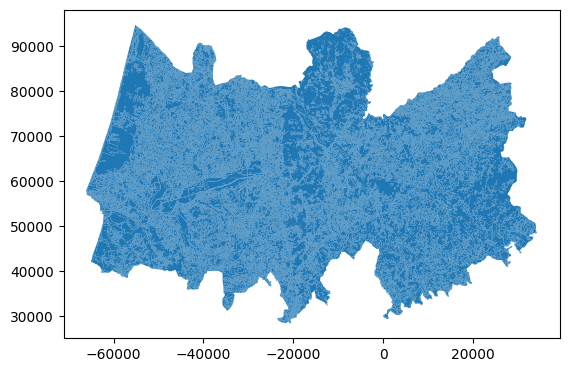

In [169]:

intersection_result = gpd.overlay(cos2018, burns, how='intersection')
intersection_result['COS18n1_L'] = 'burned_area'

# Połącz 'cos2018' i 'burns' w jedno GeoDataFrame
combined_gdf = pd.concat([intersection_result, cos2018], ignore_index=True)

combined_gdf.plot()

In [170]:
pd.unique(combined_gdf.COS18n1_L)

array(['burned_area', 'Territórios artificializados', 'Agricultura',
       'Pastagens', 'Superfícies agroflorestais (SAF)', 'Florestas',
       'Matos', 'Espaços descobertos ou com pouca vegetação',
       'Zonas húmidas', 'Massas de água superficiais'], dtype=object)